# AdaBoost模型案例（回归）

## AdaBoostRegressor

### 输入参数

- **estimator**：指定弱回归器，默认是 DecisionTreeRegressor(max_depth=3)。可以替换为任意支持 fit/predict 的回归模型。
    - 决定每次迭代训练的弱回归器的类型。
- **n_estimators**：弱回归器的数量
    - 增加n_estimators会提高模型的表现效果，但是n_estimators设置过大也会导致过拟合
- **loss**：指定集成时使用的损失函数，用于调整样本权重
    - 'linear'：线性误差，默认值
    - 'square'：平方误差，惩罚大误差更重
    - 'exponential'：指数误差，更关注离群点（慎用）
- **learning_rate**：控制每个弱回归器的权重
    - learning_rate越小，则每个弱回归器对最终决策的影响越低，模型更稳健，但是同时也需要更多的弱回归器来提升性能
- **random_state**：随机数种子，确保实验可复现

### 输出结果

- .estimators_: 所有基学习器列表
- .feature_importances_: 每个特征的重要性
- .predict(): 预测结果

## 波士顿房价数据集

**Boston Housing Dataset（波士顿房价数据集）**是一个回归数据集，该数据集包含506个样本，每个样本有13个特征，该数据集用于根据犯罪率、房屋房间数、空气污染等因素对波士顿地区的房价进行预测。

- MEDV：住房价格中位数（单位：千美元）
- CRIM：该镇的人均犯罪率
- ZN：住宅用地超过 25000 平方英尺的比例（%）
- INDUS：非零售商用土地比例（%）
- CHAS：是否靠近查尔斯河（1=是，0=否）
- NOX：一氧化氮浓度（空气污染指标，单位：ppm）
- RM：每栋住宅的平均房间数
- AGE：1940 年之前建成房屋的比例（%）
- DIS：到波士顿五个中心区域的加权距离
- RAD：距离高速公路的便利指数
- TAX：每 $10,000 资产的房产税率
- PTRATIO：城镇师生比例
- B：黑人比例指标
- LSTAT：低收入人群比例（%）

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 加载波士顿房价数据集
# 该数据集包含506个样本，每个样本有13个特征，用于预测房价
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data  # 特征变量
y = boston.target  # 目标变量（房价）
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

## 代码实现

=== 评估指标 (AdaBoost) ===
MSE: 13.4977
RMSE: 3.6739
MAE: 2.5867
MAPE: 14.45%
R² Score: 0.8159


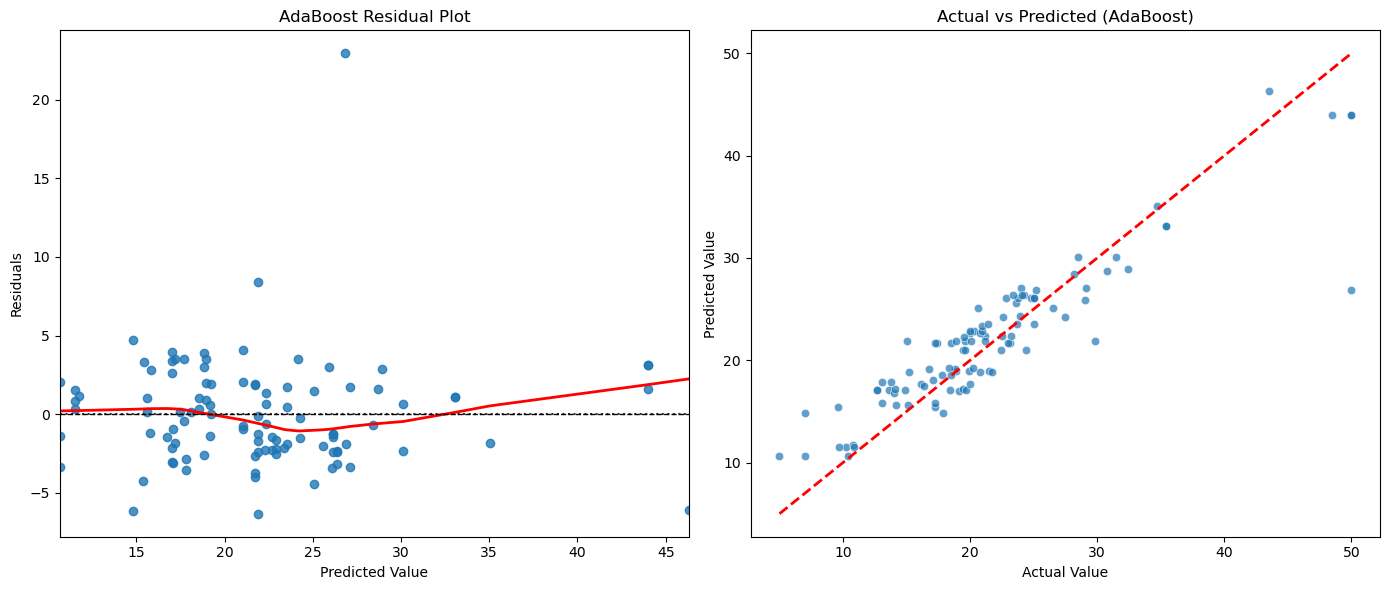

In [2]:
# 划分训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义 AdaBoost 回归模型
ada_regressor = AdaBoostRegressor(
    random_state=42,
)

# 训练模型
ada_regressor.fit(X_train, y_train)

# 进行预测
y_pred = ada_regressor.predict(X_test)

# 计算评估指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# 输出评估指标
print("=== 评估指标 (AdaBoost) ===")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

# 计算残差
residuals = y_test - y_pred

# 可视化部分
plt.figure(figsize=(14, 6))

# 1. 残差图
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("AdaBoost Residual Plot")

# 2. 实际值 vs 预测值
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted (AdaBoost)")

plt.tight_layout()
plt.show()

# AdaBoost模型可视化

## export_text

**export_text**: 将训练好的决策树模型转换为可读的文本规则
- `decision_tree`: 训练好的决策树模型
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `max_depth`: 导出的最大深度
- `spacing`: 缩进空格数
- `decimals`: 数值的小数位数
- `show_weights`: 是否显示样本权重信息

In [3]:
from sklearn.tree import export_text

# 选择 AdaBoost 中的第 0 棵基学习器
estimator_0 = ada_regressor.estimators_[0]

# 输出树的文本结构
tree_rules = export_text(estimator_0, feature_names=list(X.columns))
print(tree_rules)

|--- RM <= 6.80
|   |--- LSTAT <= 14.40
|   |   |--- DIS <= 1.38
|   |   |   |--- value: [42.63]
|   |   |--- DIS >  1.38
|   |   |   |--- value: [22.33]
|   |--- LSTAT >  14.40
|   |   |--- CRIM <= 5.51
|   |   |   |--- value: [17.00]
|   |   |--- CRIM >  5.51
|   |   |   |--- value: [11.74]
|--- RM >  6.80
|   |--- RM <= 7.47
|   |   |--- CRIM <= 51.71
|   |   |   |--- value: [32.36]
|   |   |--- CRIM >  51.71
|   |   |   |--- value: [10.40]
|   |--- RM >  7.47
|   |   |--- RAD <= 16.00
|   |   |   |--- value: [44.99]
|   |   |--- RAD >  16.00
|   |   |   |--- value: [21.90]



## plot_tree

**plot_tree**: 生成直观的决策树树形结构图
- `decision_tree`: 训练好的决策树模型
- `max_depth`: 显示的最大深度
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `label`: 节点信息显示内容
- `filled`: 是否填充颜色
- `impurity`: 是否显示不纯度
- `node_ids`: 是否显示节点ID
- `proportion`: 是否显示比例
- `rounded`: 是否圆角边框
- `precision`: 数值显示精度
- `fontsize`: 字体大小

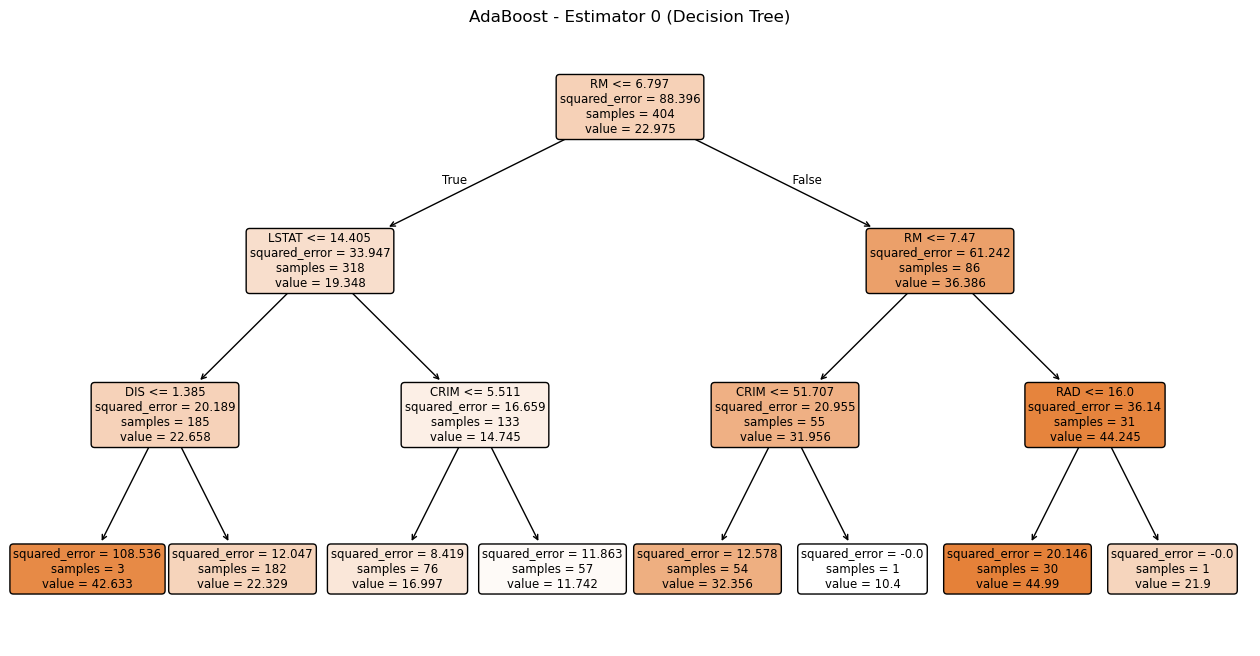

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 选择第一个基学习器（索引从 0 开始）
estimator_0 = ada_regressor.estimators_[0]

# 可视化决策树结构
plt.figure(figsize=(16, 8))
plot_tree(estimator_0,
          feature_names=X.columns,
          class_names=["Not Survived", "Survived"],
          filled=True,
          rounded=True)
plt.title("AdaBoost - Estimator 0 (Decision Tree)")
plt.show()


# 特征重要度

**特征重要性(feature importance)**是AdaBoost模型中用于衡量各个特征对预测结果贡献程度的指标。
- 在 AdaBoostRegressor 中，模型是由一系列弱回归器（通常是决策树）组成的加权集合。
- 每个基学习器在某些特征上进行划分，对应带来了预测误差（如 MSE）的下降。
- 模型将所有基学习器中，由各特征引起的误差降低值进行加权累加（考虑学习器权重），最后归一化，得到每个特征的相对重要性。
- 计算公式为：
$$\text{Importance}_j = \sum_{m=1}^{M} \alpha_m \cdot \sum_{t \in T_m} \Delta \text{MSE}_t \cdot \mathbb{1}(j \in t)$$
- 其中：
    - $M$：AdaBoost 中的弱学习器数量（即树的棵树数） 
    - $\alpha_m$：第$m$个学习器的权重
    - $T_m$：第$m$棵树中的所有非叶节点 
    - $\Delta \text{MSE}_t$：该节点分裂所带来的误差（MSE）下降
    - $\mathbb{1}(j \in t)$：指示函数，若节点$t$使用了特征$j$进行划分，则为 1，否则为 0 

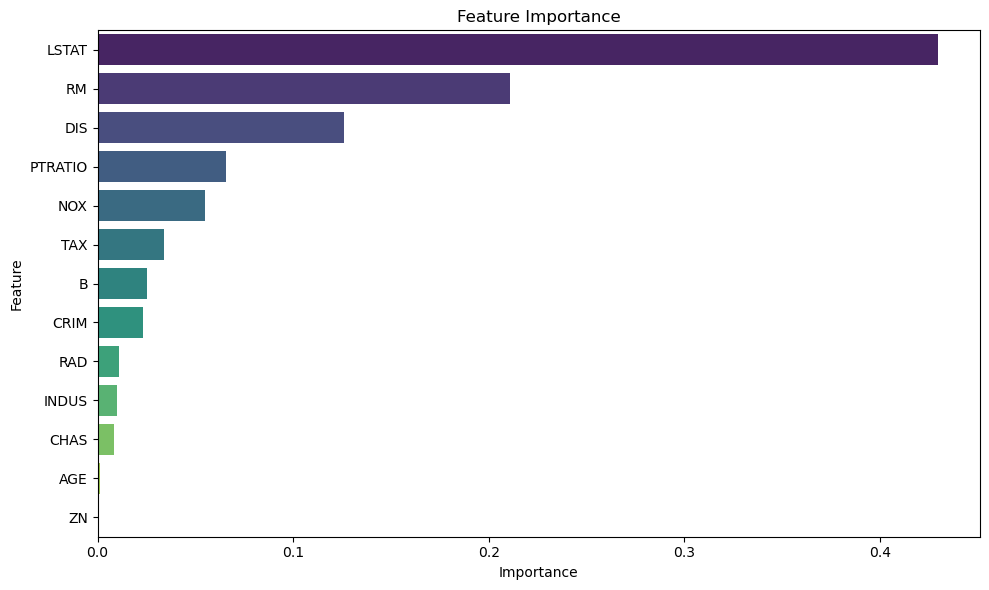

In [5]:
# 特征重要性
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': ada_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()